---

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

# Lagrange Points

The [Lagrange points](https://en.wikipedia.org/wiki/Lagrangian_point) are the five points located around a pair of celestial bodies where the net gravitational field is exactly zero as measured in a co-rotating reference frame (i.e. accounting for the non-inertial centrifugal force). The goal of the next program is to calculate the five Lagrange points for the Earth-Moon system.

In a reference frame that rotates about the earth-moon system's center of mass, the effective gravitational potential is

$$V=-\frac{GM}{r_E} - \frac{Gm}{r_m} - \tfrac12 r^2 \omega^2\,$$

where $G=6.674\times10^{-11}$ m$^3$kg$^{-1}$s$^{-2}$, $M=5.974\times10^{24}$ kg is the mass of the earth, $m=7.348\times10^{22}$ kg is the mass of the moon, and $\omega=2.662\times10^{-6}$ s$^{-1}$ is the orbital angular frequency of the moon about the earth-moon system's center of mass. Note that the third term above is the *centrifugal force* introduced by working in co-rotating coordinates. The three distances $r_E$, $r_m$, and $r$ are measured **from** the earth, moon, and center of mass, respectively. To convert between cartesian and polar coordinates, one can use 

$$r = \sqrt{x^2 + y^2}\,,$$

$$r_E = \sqrt{(x-x_E)^2 + (y-y_E)^2}\,,$$

and

$$r_m = \sqrt{(x-x_m)^2 + (y-y_m)^2}\,,$$

where $(x_E, y_E)$ and $(x_m, y_m)$ are the locations of the earth and moon. It is important to note that the Earth-moon system orbits around its center of mass, not the Earth's center, so (0,0) coincides with the center of mass. Thus, the location of the earth and moon can be calculated by the fact that the radius of the moon's orbit is $R=3.844\times10^8$ m.

Finally, the gravitation field is given by
    
$$\vec{F}=-\vec{\nabla}V\,.$$
    
The five locations where $|\vec{F}|=0$, are called the **Langrange Points**. In principle, an object placed there could remain stationary relative to the earth and moon. (In practice only $L_4$ and $L_5$ are stable once small perturbations are considered).

This program will make a plot of the Earth-moon system, the contours of the gravitational potential of said system, and the 5 labeled Lagrangian Points.

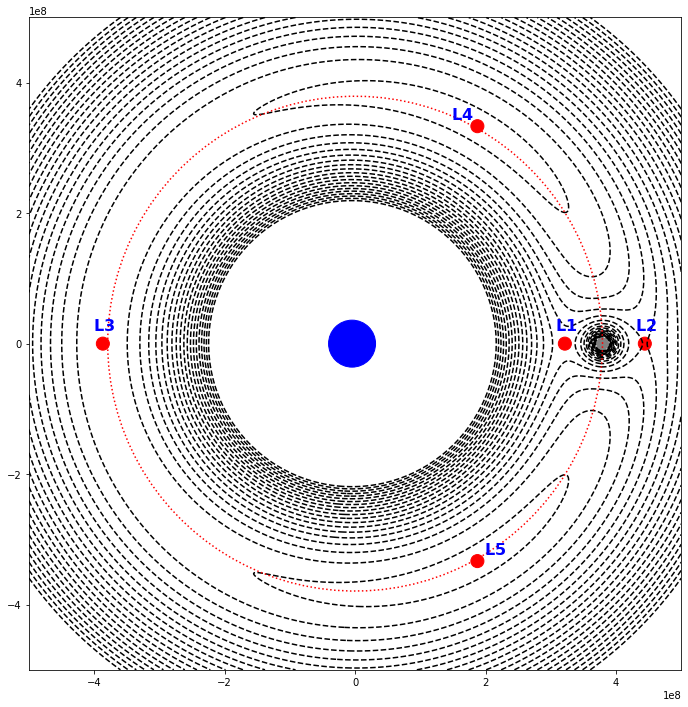

In [36]:
plt.figure(figsize = (12, 12))

# ALL DISTANCES ARE IN METERS

# Set up constants x-coordinate of Earth and moon (since y = 0)
E_center = -4670000    # Distance from Earth's center to the center of mass of the Earth-moon system
moon_center = -4670000+384000000    # Aforementioned distance plus the given distance b/w Earth and moon
G = 6.674e-11
M = 5.974e24
m = 7.348e22
w = 2.662e-6

earth = plt.Circle((E_center, 0), radius = 36000000, color = 'blue')
moon = plt.Circle((moon_center, 0), radius = 9000000, color = 'gray')

# make plot to scale so that no constants have to be altered
x_ = np.linspace(-5e8, 5e8, 1000)
y_ = np.linspace(-5e8, 5e8, 1000)
x, y = np.meshgrid(x_, y_)

# convert from cartesian to polar for calculations
r = np.sqrt(x**2 + y**2)
r_E = np.sqrt((x-E_center)**2 + y**2)
r_m = np.sqrt((x-moon_center)**2 + y**2)

# potential function as given above
V = -(G*M/r_E) - (G*m/r_m) - 0.5*(r**2)*(w**2)


def F(xy):
    """
    Use the analytically calculated gradient of V and the x and y coordinates
    to calculate the x and y components of the gravitational force from the 
    Earth, moon, and centrifugal force. Then, sum these all up to get the 
    total components of the gravitational force at each point in the grid.
    """
    x, y = xy
    r = np.sqrt(x**2 + y**2)
    r_E = np.sqrt((x-E_center)**2 + y**2)
    r_m = np.sqrt((x-moon_center)**2 + y**2)
    
    f = r*w**2
    theta = np.arctan2(y, x)
    fx = f*np.cos(theta)
    fy = f*np.sin(theta)
    
    f_e = -G*M/(r_E**2)
    theta_e = np.arctan2(y, (x-E_center))
    fx_e = f_e*np.cos(theta_e)
    fy_e = f_e*np.sin(theta_e)
    
    f_m = -G*m/(r_m**2)
    theta_m = np.arctan2(y, (x-moon_center))
    fx_m = f_m*np.cos(theta_m)
    fy_m = f_m*np.sin(theta_m)
    
    Fx = fx + fx_e + fx_m
    Fy = fy + fy_e + fy_m
    F = np.sqrt(Fx**2 + Fy**2)
    return F

# Guesses for Lagrange Point coordinates based on comparing the locations of the points on
# reference pictures, relative to their contour lines, to the contour lines on my graph.
# As described above, these points occur at 0 net force, so we want to minimize the force
# around where the points should be.
L1 = optimize.minimize(F, (3e8, 0), method = 'Powell')
L2 = optimize.minimize(F, (4e8, 0), method = 'Powell')
L3 = optimize.minimize(F, (-3e8, 0), method = 'Powell')
L4 = optimize.minimize(F, (2e8, 3e8), method = 'Powell')
L5 = optimize.minimize(F, (2e8, -3e8), method = 'Powell')

# To make the locations of the points more obvious, represent them as filled red circles
L1 = plt.Circle((L1.x[0], L1.x[1]), radius = 1e7, color = 'red')
L2 = plt.Circle((L2.x[0], L2.x[1]), radius = 1e7, color = 'red')
L3 = plt.Circle((L3.x[0], L3.x[1]), radius = 1e7, color = 'red')
L4 = plt.Circle((L4.x[0], L4.x[1]), radius = 1e7, color = 'red')
L5 = plt.Circle((L5.x[0], L5.x[1]), radius = 1e7, color = 'red')

ax = plt.gca()
plt.axis("scaled")
plt.xlim(-5e8, 5e8)
plt.ylim(-5e8, 5e8)

# plot earth and moon representations
ax.add_patch(earth)
ax.add_patch(moon)

# add each of the Lagrange points to the plot, along with labels placed in the
# most convenient spots I could find given the contours
ax.add_patch(L1)
plt.text(L1.center[0]-0.15e8, 0.2e8, r"$\bf{L1}$", fontsize = 16, color = 'blue')
ax.add_patch(L2)
plt.text(L2.center[0]-0.15e8, 0.2e8, r"$\bf{L2}$", fontsize = 16, color = 'blue')
ax.add_patch(L3)
plt.text(L3.center[0]-0.15e8, 0.2e8, r"$\bf{L3}$", fontsize = 16, color = 'blue')
ax.add_patch(L4)
plt.text(L4.center[0]-0.4e8, L4.center[1]+0.1e8, r"$\bf{L4}$", fontsize = 16, color = 'blue')
ax.add_patch(L5)
plt.text(L5.center[0]+0.1e8, L5.center[1]+0.1e8, r"$\bf{L5}$", fontsize = 16, color = 'blue')

# Plot the path of the moon's orbit as a dashed red line
t = np.linspace(0, 2*np.pi, 100)
a_moon = (384000000-4670000)
plt.plot(a_moon*np.cos(t), a_moon*np.sin(t), 'r:')

# Plot contours with sufficient spacing such that the presence of the Lagrange points can be seen in them.
# Also, no need to show V all the way up to the Earth, as no meaningfuly information is gained for our purposes here.
plt.contour(V, levels = np.linspace(-2000000, -900000, 50), colors = 'k', extent = (-5e8, 5e8, -5e8, 5e8))
plt.show()